1
2
3
All done


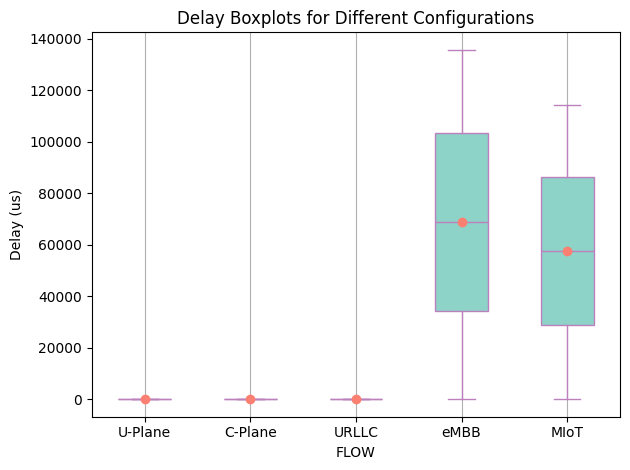

Mean Delay for U-Plane: 4.628850251758504 us
Mean Delay for C-Plane: 4.3335877131511324 us
Mean Delay for URLLC: 5.803603279294957 us
Mean Delay for eMBB: 68775.57721756845 us
Mean Delay for MIoT: 57391.8807655868 us
4411741
14945968
1040206


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Flow20M_39/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_us = []
delay_control = []
delay_user = []
delay_rt = []
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
    else: 
        delay_rt = []
        for num in AAUs:
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    
print("All done")
# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
delay = []
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")

print(len(delay_us[2]))
print(len(delay_us[3]))
print(len(delay_us[4]))




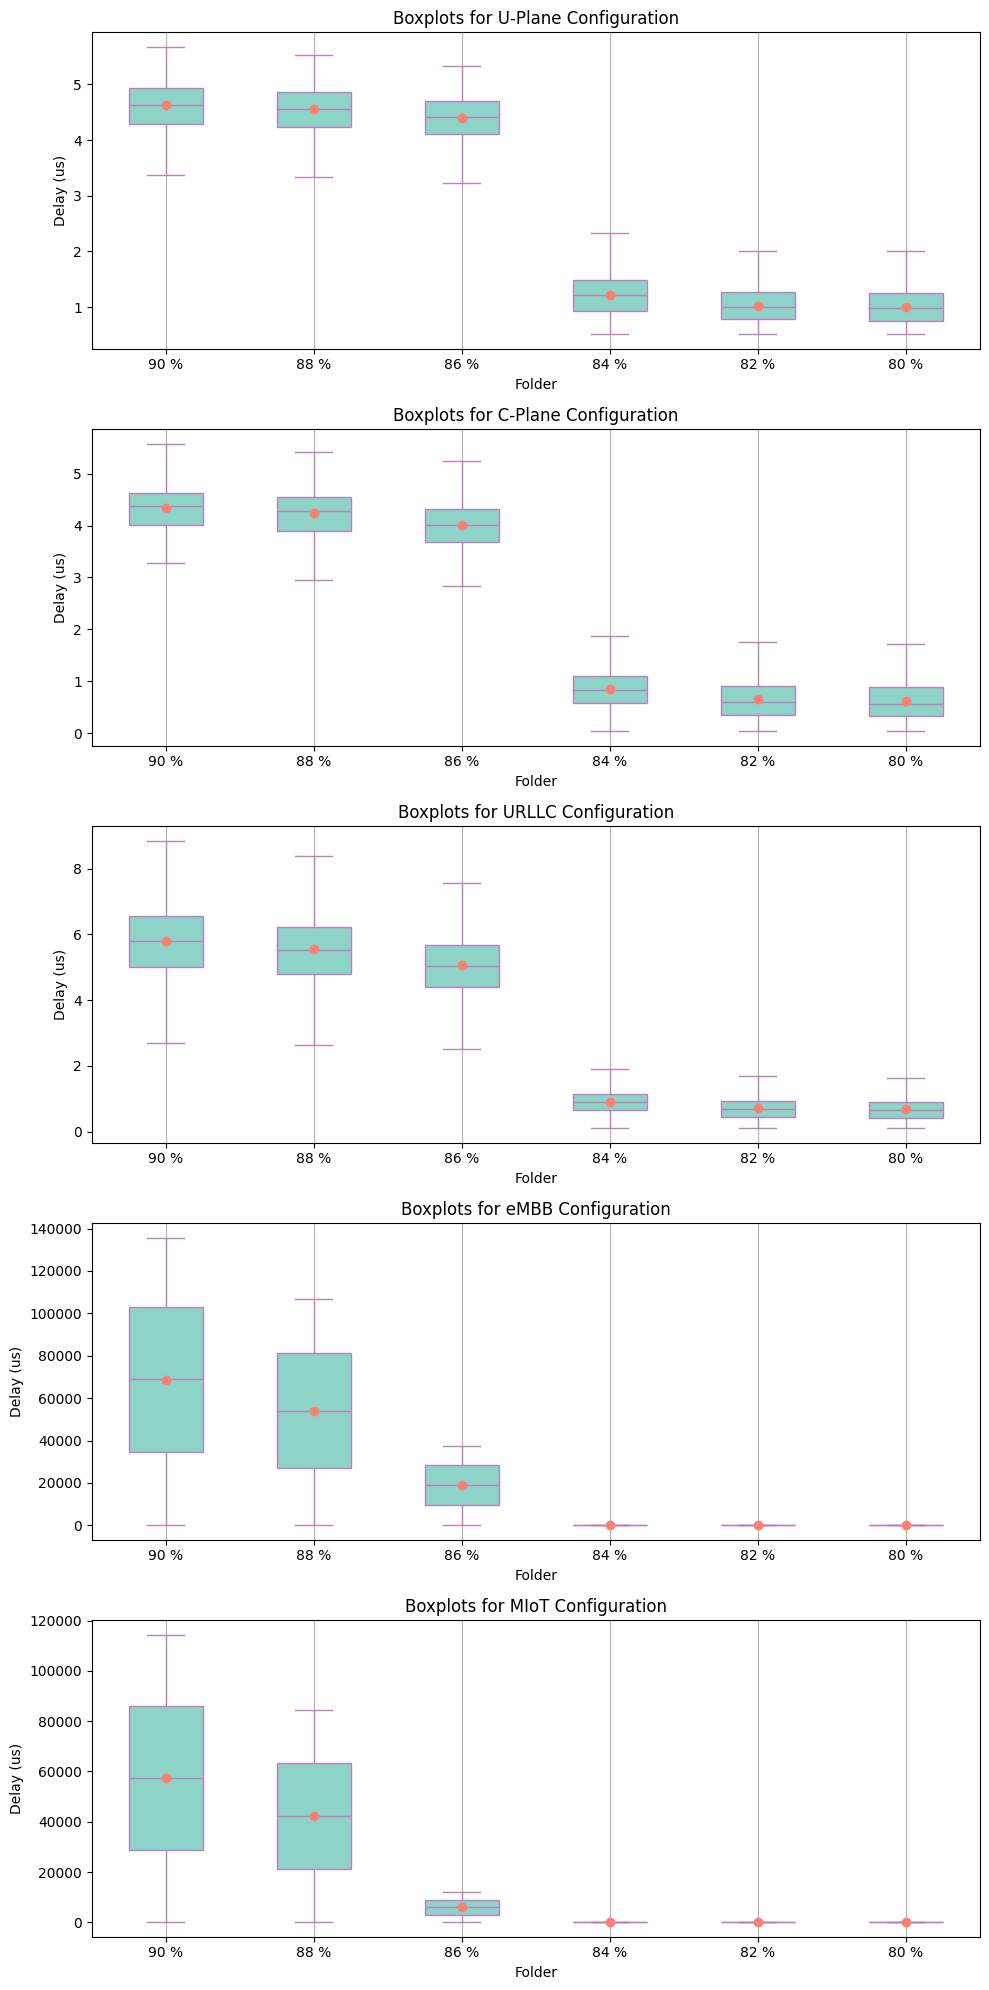

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1

def process_folder(folder):
    delay = []
    delay_aux = [] 
    delay_us = []
    delay_control = []
    delay_user = []
    delay_rt = []

    for flow in Flows:
        if flow == 1:
            for ru in Ru:
                CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
                UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
                CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
                URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

                min_len = min(len(UTx), len(URx))
                delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
                min_len = min(len(CTx), len(CRx))
                delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])

            delay.append(np.concatenate(delay_user))
            delay.append(np.concatenate(delay_control))
        else: 
            delay_rt = []
            for num in AAUs:
                Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
                Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
                min_len = min(len(Tx), len(Rx))
                delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

            delay.append(np.concatenate(delay_rt))

    delay_us = [arr*1e-3 for arr in delay]    
    return delay_us

folders = ["./sim_results/Flow20M_39/", "./sim_results/Flow20M_40/", "./sim_results/Flow20M_41/", "./sim_results/Flow20M_42/", "./sim_results/Flow20M_43/", "./sim_results/Flow20M_44/"]

# Process data for each folder
delay_us_dict = {folder: process_folder(folder) for folder in folders}

# Plot all boxplots in the same figure
fig, axes = plt.subplots(nrows=len(configs_txt), ncols=1, figsize=(10, 20))

for i, config in enumerate(configs_txt):
    ax = axes[i]
    # Collect delay data for this configuration label from all folders
    data = [delay_us_dict[folder][i] for folder in folders]
    # Plot boxplots for this configuration label
    ax.boxplot(
        data,
        labels=[f"{90-2*(j)} %" for j in range(len(folders))],
        showmeans=True,
        showfliers=False,
        patch_artist=True,  # fill with color
        boxprops=dict(facecolor=colors[0], color=colors[9]),
        capprops=dict(color=colors[9]),
        whiskerprops=dict(color=colors[9]),
        flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
        medianprops=dict(color=colors[9]),
        meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
    )
    ax.set_title(f"Boxplots for {config} Configuration")
    ax.set_ylabel("Delay (us)")
    ax.set_xlabel("Folder")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Extracting boxplot information
boxplot_info = {
    "lw": [item.get_ydata()[1] for item in bp['whiskers'][::2]],
    "lq": [item.get_ydata()[0] for item in bp['whiskers'][::2]],
    "med": [item.get_ydata()[1] for item in bp['medians']],
    "uq": [item.get_ydata()[0] for item in bp['whiskers'][1::2]],
    "uw": [item.get_ydata()[1] for item in bp['whiskers'][1::2]],
    "xaux": range(len(configs_txt)),
    "avg": [item.get_ydata()[0] for item in bp['means']]
}

# Write boxplot information to a text file
with open(folder + "boxplot_info.txt", "w") as file:
    file.write("lw\tlq\tmed\tuq\tuw\txaux\tavg\n")
    for i in range(len(configs_txt)):
        line = "\t".join(str(boxplot_info[key][i]) for key in boxplot_info.keys())
        file.write(line + "\n")

if (delay_us[1] == 0).any():
    print(True)

1
2
3
All done


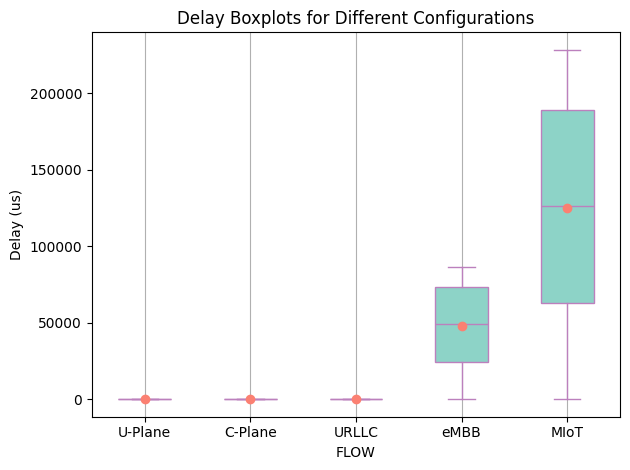

Mean Delay for U-Plane: 4.537053388028221 us
Mean Delay for C-Plane: 4.21315736797657 us
Mean Delay for URLLC: 4.951562345477713 us
Mean Delay for eMBB: 48185.031867894766 us
Mean Delay for MIoT: 124815.24037397535 us
4894116
17822676
968326


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Flow20M_40/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_us = []
delay_control = []
delay_user = []
delay_rt = []
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
    else: 
        delay_rt = []
        for num in AAUs:
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    
print("All done")
# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
delay = []
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")

print(len(delay_us[2]))
print(len(delay_us[3]))
print(len(delay_us[4]))




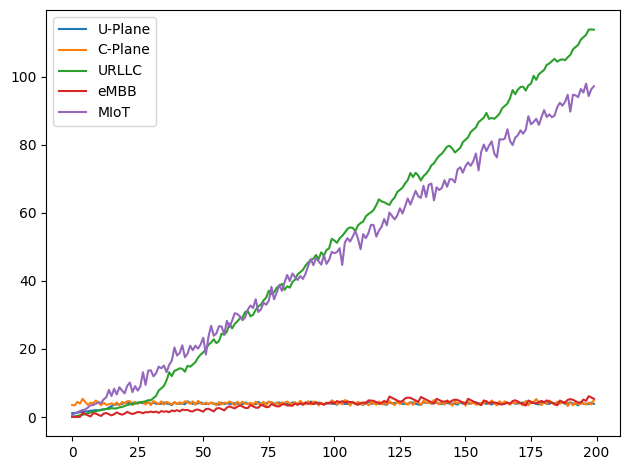

In [73]:
plt.plot(delay_us[0][0:200], label="U-Plane")
plt.plot(delay_us[1][0:200], label="C-Plane")
plt.plot(delay_us[2][0:200], label="URLLC")
plt.plot(delay_us[3][0:200], label="eMBB")
plt.plot(delay_us[4][0:200], label="MIoT")
plt.legend()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


def calculate_wrr_weights(data_link_rate, percentage_times, average_packet_sizes):
    weights = []

    # Calculate weights for each queue
    for time, size in zip(percentage_times, average_packet_sizes):
        weight = (time / 100) * (data_link_rate/8) / size
        # print(weight)
        weights.append(weight)

    # Normalize weights
    total_weight = sum(weights)
    normalized_weights = [weight / total_weight for weight in weights]

    return normalized_weights

# Example parameters
data_link_rate = 22e9  # Gbps
percentage_times = [42, 48, 10]  # Percentages for Queue 1, Queue 2, Queue 3
average_packet_sizes = [283, 92, 269]  # Average packet sizes for Queue 1, Queue 2, Queue 3

# Calculate WRR weights
wrr_weights = calculate_wrr_weights(data_link_rate, percentage_times, average_packet_sizes)
print("WRR Weights:", np.multiply(wrr_weights,100))


WRR Weights: [20.98189053 73.76242261  5.25568686]


In [12]:
def calculate_wrr_weights(data_link_rate, percentage_times, average_packet_sizes, entry_flow_rates):
    weights = []

    # Calculate weights for each queue
    for time, size, entry_rate in zip(percentage_times, average_packet_sizes, entry_flow_rates):
        weight = (entry_rate/8) / size
        weights.append(weight)

    # Normalize weights
    total_weight = sum(weights)
    normalized_weights = [weight / total_weight for weight in weights]

    return normalized_weights


# Parameters
data_link_rate = 45e9  # Gbps

average_packet_sizes = [283, 92, 269]  # Average packet sizes for Queue 1, Queue 2, Queue 3
entry_flow_rates = [833.33e6, 833.33e6, 150e6]   # Entry flow rates for Queue 1, Queue 2, Queue 3

# Calculate WRR weights
wrr_weights = calculate_wrr_weights(data_link_rate, percentage_times, average_packet_sizes, entry_flow_rates)
print("WRR Weights:", wrr_weights)


WRR Weights: [0.23444153686704777, 0.721162553623636, 0.044395909509316156]


In [3]:
res = []

for value_1, value_2 in zip(wrr_weights, average_packet_sizes):
    print(value_1*value_2*100)
    res.append(value_1*value_2*100)
res = res/np.sum(res)    
print(res)

5937.875019782507
6786.1428797514345
1413.7797666148824
[0.42 0.48 0.1 ]


flow
0    16.253401
1    78.463435
2     5.283163
dtype: float64


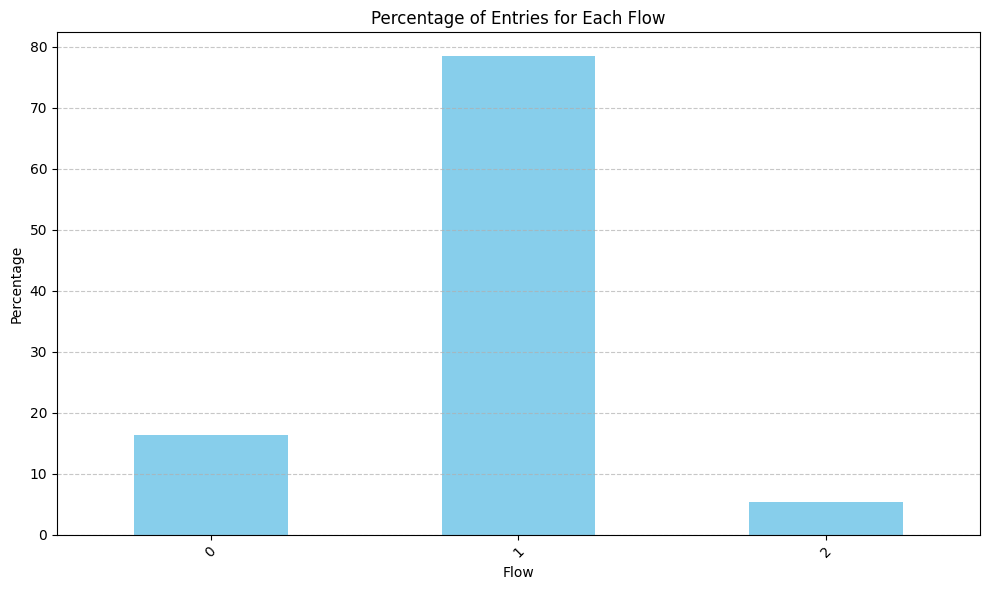

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
folder = "./sim_results/"
Sched_dec = pd.read_csv(f"{folder}sched-wfq-decision.log", sep='\s+', header=None, names=["flow", "pktsize"])
# Count the number of entries with flow equal to a specific number
flow_count = Sched_dec.groupby('flow').size()
# print(flow_count)

# Calculate the percentage of entries for each flow
percentage = (flow_count / flow_count.sum()) * 100
print(percentage)
# Plotting
plt.figure(figsize=(10, 6))
percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Entries for Each Flow')
plt.xlabel('Flow')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1
2
3
All done


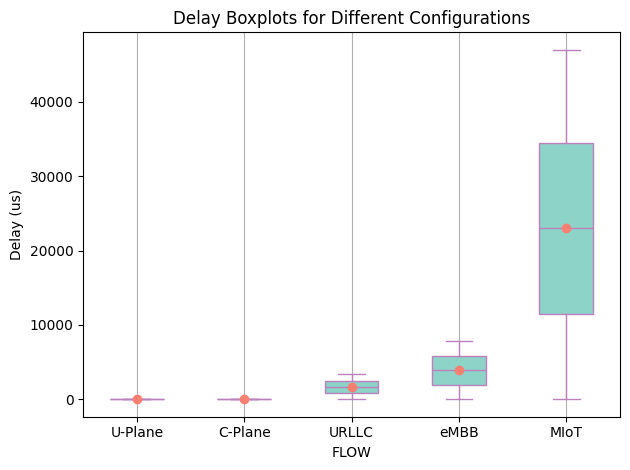

Mean Delay for U-Plane: 4.522157743055556 us
Mean Delay for C-Plane: 4.201283772981615 us
Mean Delay for URLLC: 1658.0721217591658 us
Mean Delay for eMBB: 3921.7657352563974 us
Mean Delay for MIoT: 22979.67063134509 us
473952
1801154
71118


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba_Pesos/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_us = []
delay_control = []
delay_user = []
delay_rt = []
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
    else: 
        delay_rt = []
        for num in AAUs:
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    
print("All done")
# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
delay = []
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")

print(len(delay_us[2]))
print(len(delay_us[3]))
print(len(delay_us[4]))


